Привет!  меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Приятно было проверять твою работу
- Я оставил некоторые советы, обрати на них внимание. Надеюсь они будут полезными или интересными

- Тебе удалось справиться с задачей текстов, поздравляю!
* С радостью принимаю работу и желаю удачи в дальнейшем обучении! Также напомню, что если у тебя появились вопросы - ты всегда их можешь задать мне через куратора,

<font color='green'><b>Полезные (и просто интересные) материалы:</b> \
Для работы с текстами используют и другие подходы. Например, сейчас активно используются RNN (LSTM) и трансформеры (BERT и другие с улицы Сезам, например, ELMO). НО! Они не являются панацеей, не всегда они нужны, так как и TF-IDF или Word2Vec + модели из классического ML тоже могут справляться. \
BERT тяжелый, существует много его вариаций для разных задач, есть готовые модели, есть надстройки над библиотекой transformers. Если, обучать BERT на GPU (можно в Google Colab или Kaggle), то должно быть побыстрее.\
https://huggingface.co/transformers/model_doc/bert.html \
https://t.me/renat_alimbekov \
https://colah.github.io/posts/2015-08-Understanding-LSTMs/ - Про LSTM \
https://web.stanford.edu/~jurafsky/slp3/10.pdf - про энкодер-декодер модели, этеншены\
https://pytorch.org/tutorials/beginner/transformer_tutorial.html - официальный гайд
по трансформеру от создателей pytorch\
https://transformer.huggingface.co/ - поболтать с трансформером \
Библиотеки: allennlp, fairseq, transformers, tensorflow-text — множествореализованных
методов для трансформеров методов NLP \
Word2Vec https://radimrehurek.com/gensim/models/word2vec.html 

<font color='green'>Пример BERT с GPU:
```python
%%time
from tqdm import notebook
batch_size = 2 # для примера возьмем такой батч, где будет всего две строки датасета
embeddings = [] 
for i in notebook.tqdm(range(input_ids.shape[0] // batch_size)):
        batch = torch.LongTensor(input_ids[batch_size*i:batch_size*(i+1)]).cuda() # закидываем тензор на GPU
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)]).cuda()
        
        with torch.no_grad():
            model.cuda()
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)
        
        embeddings.append(batch_embeddings[0][:,0,:].cpu().numpy()) # перевод обратно на проц, чтобы в нумпай кинуть
        del batch
        del attention_mask_batch
        del batch_embeddings
        
features = np.concatenate(embeddings) 
```
Можно сделать предварительную проверку на наличие GPU.\
Например, так: ```device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")```\
Тогда вместо .cuda() нужно писать .to(device)



<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-импорт-библиотек" data-toc-modified-id="Загрузка-и-импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка и импорт библиотек</a></span></li><li><span><a href="#Загрузка-и-просмотр-данных" data-toc-modified-id="Загрузка-и-просмотр-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка и просмотр данных</a></span></li><li><span><a href="#Обработка-текста-и-лемматизация" data-toc-modified-id="Обработка-текста-и-лемматизация-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Обработка текста и лемматизация</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Перебор-гиперпараметров-для-трех-моделей" data-toc-modified-id="Перебор-гиперпараметров-для-трех-моделей-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Перебор гиперпараметров для трех моделей</a></span></li><li><span><a href="#Выбор-лучшей-модели" data-toc-modified-id="Выбор-лучшей-модели-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Выбор лучшей модели</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Тестирование</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

### Загрузка и импорт библиотек

In [1]:
!pip install scikit-learn -U -q
!pip install optuna -U -q
#!pip install optuna-integration[sklearn] -q

In [2]:
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
#МО БИБЛИОТЕКИ
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
#импорт моделей
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, precision_score, \
recall_score, confusion_matrix, precision_recall_curve, roc_auc_score, make_scorer, f1_score
#импорт метрик
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
#импорт метода селекции
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
#импорт методов масштабирования и кодирования
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#импорт инструментов для автоматизированного поиска гиперпараметров
from sklearn.pipeline import Pipeline
#импорт методов для работы с пайплайнами
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet as wn
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer
#импорт методов для работы с текстом
from tqdm.notebook import tqdm
tqdm.pandas(desc="Progress")
#импорт прогресс-бара

#загрузка библиотек

In [3]:
nltk.download('punkt')                        #модуль для токенизации
nltk.download('averaged_perceptron_tagger')   #модуль для определения части речи
nltk.download('wordnet')                      #модуль для лемматизации
nltk.download('stopwords')                    #модуль для удаления стоп-слов

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True



<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты на месте
</div>


### Загрузка и просмотр данных

In [4]:
df = pd.read_csv('/datasets/toxic_comments.csv', index_col = 0)

In [5]:
df.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


### Обработка текста и лемматизация

In [7]:
def get_wordnet_pos(t):
    if t.startswith('J'):
        return wn.ADJ
    elif t.startswith('V'):
        return wn.VERB
    elif t.startswith('N'):
        return wn.NOUN
    elif t.startswith('R'):
        return wn.ADV
    else:
        return wn.NOUN
#функция преобразует POS-тег NLTK в формат WordNet

In [8]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)           #оставляем только буквы
    text = re.sub(r'\s+', ' ', text).strip().lower()   #приводим к нижнему регистру и убираем лишние пробелы
#очистка текста
    tokens = word_tokenize(text)
#токенизация
    lemmatizer = WordNetLemmatizer()
    tagged_tokens = pos_tag(tokens)  #получаем теги частей речи
#pos-tagging
    stop_words = set(stopwords.words('english'))
#создание списка стоп-слов
    lemmas = [
        lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag))
        for word, tag in tagged_tokens
        if word not in stop_words and word.isalpha() and len(word) > 2
    ]
#цикл с проверкой слов перед лемматизацией 
#и применение лемматизации с преобразованными тегами при помощи функции get_wordnet_pos
    return ' '.join(lemmas)
#функция для предобработки текста


<div class="alert alert-block alert-success">
<b>Успех:</b>  Очистка и лемматизация применены корректно
</div>


In [9]:
df['lemm_text'] = df['text'].progress_apply(preprocess_text) 

Progress:   0%|          | 0/159292 [00:00<?, ?it/s]

In [10]:
df.head()

,text,toxic,lemm_text
0,Explanation\nWhy the edits made under my usern...,0,explanation edits make username hardcore metal...
1,D'aww! He matches this background colour I'm s...,0,aww match background colour seemingly stick th...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man really try edit war guy constantly rem...
3,"""\nMore\nI can't make any real suggestions on ...",0,make real suggestion improvement wonder sectio...
4,"You, sir, are my hero. Any chance you remember...",0,sir hero chance remember page



<div class="alert alert-block alert-success">
<b>Успех:</b>  Приятно видеть результаты до/после. 
</div>



<div class="alert alert-block alert-info">
    
<b>Совет:</b> 
    
    

	

- после очистки и лемматизации (и убрав стопслова) можно провести частотный анализ текста/[облако слов](https://habr.com/ru/post/517410/) - чтобы получить общее представление о тематике и о наиболее часто встречаемых словах в токсичных и нетоксичных твитах Кроме того графики, рисунки делают проект визуально интересней

В тренажере облако импортируем так

    !/opt/conda/bin/python -m pip install wordcloud


или

    !/opt/conda/bin/python -m pip install wordcloud==1.8.2.2


И возможно дополнительно надо будет сделать



    !pip install Pillow==8.0.0
</div>


## Обучение

### Подготовка

Посмотрим на баланс классов:

In [11]:
RANDOM_STATE = 42

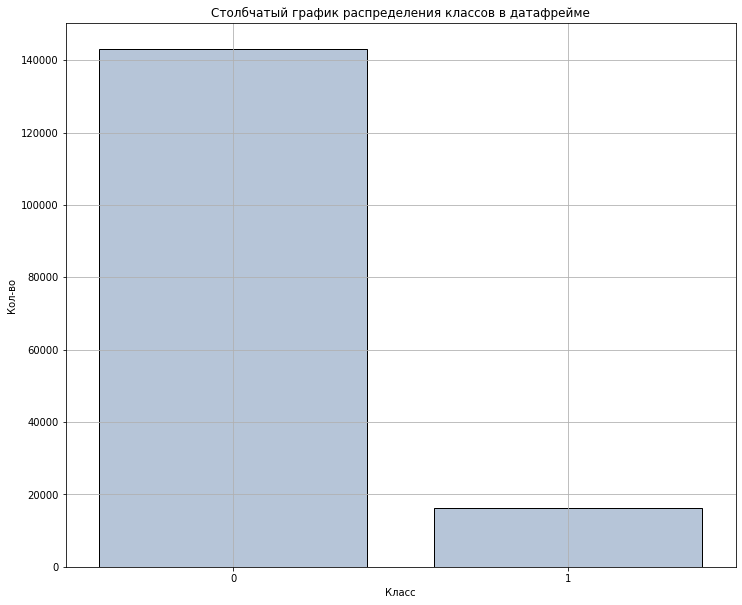

In [12]:
plt.figure(figsize=[12,10])
sns.countplot(data = df, x = 'toxic', color='lightsteelblue', edgecolor='black')
plt.xlabel('Класс')
plt.ylabel('Кол-во')
plt.title('Столбчатый график распределения классов в датафрейме')
plt.grid(True)
plt.show()

In [13]:
print('-'*50)
print('Соотношение классов в датафрейме')
print('-'*50)
display(df['toxic'].value_counts(normalize=True))
print('-'*50)

--------------------------------------------------
Соотношение классов в датафрейме
--------------------------------------------------


0    0.898388
1    0.101612
Name: toxic, dtype: float64

--------------------------------------------------


Классы несбалансированы, при разделении на обучающую и тестовую будем применять параметр **stratify**:




<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что обнаружен дисбаланс - это очень важно в задачах калссификации
</div>


In [14]:
X = df['lemm_text']
y = df['toxic']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)
#разделяем данные

In [16]:
print('-'*50)
print('Размер X_train:', X_train.shape, 'Размер y_train:', y_train.shape)
print('-'*50)
print('Размер X_test:', X_test.shape, 'Размер y_test:', y_test.shape)
print('-'*50)

--------------------------------------------------
Размер X_train: (127433,) Размер y_train: (127433,)
--------------------------------------------------
Размер X_test: (31859,) Размер y_test: (31859,)
--------------------------------------------------


In [17]:
print('-'*50)
print('Соотношение классов в y_train')
print('-'*50)
display(y_train.value_counts(normalize=True))
print('-'*50)
print('Соотношение классов в y_test')
print('-'*50)
display(y_test.value_counts(normalize=True))
print('-'*50)
#проверяем соотношение

--------------------------------------------------
Соотношение классов в y_train
--------------------------------------------------


0    0.898386
1    0.101614
Name: toxic, dtype: float64

--------------------------------------------------
Соотношение классов в y_test
--------------------------------------------------


0    0.898396
1    0.101604
Name: toxic, dtype: float64

--------------------------------------------------


Для дальнейшего подбора гиперпараметров возьмем **10%** от этих данных, чтобы поиск оптимальных занял меньше времени и ресурсов

In [18]:
X_train_hp, _, y_train_hp, _ = train_test_split(X_train, y_train, train_size=0.1, random_state=RANDOM_STATE, stratify=y_train)
#разделяем данные для подбора гиперпараметров (возьмем 10% от всего датасета)

In [19]:
print('-'*50)
print('Размер X_train_hp:', X_train_hp.shape, 'Размер y_train_hp:', y_train_hp.shape)
print('-'*50)

--------------------------------------------------
Размер X_train_hp: (12743,) Размер y_train_hp: (12743,)
--------------------------------------------------


In [20]:
print('-'*50)
print('Соотношение классов в y_train_hp')
print('-'*50)
display(y_train_hp.value_counts(normalize=True))
print('-'*50)
#проверяем соотношение

--------------------------------------------------
Соотношение классов в y_train_hp
--------------------------------------------------


0    0.898376
1    0.101624
Name: toxic, dtype: float64

--------------------------------------------------


### Перебор гиперпараметров для трех моделей

Для подбора гиперпараметров будем использовать библиотеку **Optuna** с байесовской оптимизацией:

Напишем функции для перебора гиперпараметров для трех моделей - **LinearSVC**, **DecisionTreeClassifier**, **LogisticRegression**, метрику будем использовать **f1-score** при кросс-валидации

Что бы каждый фолд содержал примерно такое же соотношение классов, как и всё исходное множество, применим **StratifiedKFold** иначе некоторые фолды могут либо вообще не содержать семплов другого классов, либо содержать их слишком мало

In [21]:
SCV = StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

Векторизацию мы будем проводить внутри функции по ряду причин:
- Избежание утечки данных. При кросс-валидации векторизатор обучается только на обучающей части фолда , а применяется на тестовой. Если заранее обучить векторизатор на всех данных, это может давать слишком высокие метрики при кросс-валидации.
- Возможность подбора параметров векторизации при помощи **Optuna**
- Корректная работа с кросс-валидацией. Все преобразования должны быть локальными для каждого фолда для корректной оценки. 

In [22]:
def objective_lr(trial):
    params = {
        'tfidf__max_features': trial.suggest_int('tfidf__max_features', 1000, 5000),
        'tfidf__ngram_range': tuple([1, trial.suggest_int('tfidf__ngram_range', 1, 2)]),
        'tfidf__min_df': trial.suggest_int('tfidf__min_df', 1, 5),
        #подбор для векторизатора
        'model__C': trial.suggest_float('model__C', 0.01, 10, log=True),
        'model__penalty': trial.suggest_categorical('model__penalty', ['l1', 'l2']),
        'model__solver': trial.suggest_categorical('model__solver', ['liblinear', 'saga'])
        #подбор для модели
    }

    model = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('model', LogisticRegression(random_state=RANDOM_STATE, max_iter=1000))
    ])
    #пайплайн с векторизатором и моделью

    model.set_params(**params)
    #применение подобранных параметров
    
    score = cross_val_score(model, X_train_hp, y_train_hp, cv=SCV, scoring='f1', n_jobs=-1, error_score='raise').mean()
    #кросс-валидация со средней оценкой
    return score
#функция подбора гиперпараметров для LogisticRegression




<div class="alert alert-block alert-success">
<b>Успех:</b> Лайк за использование пайплайна - это грамотный подход при работе с векторизацией и кросс-валидацией
</div>


In [23]:
def objective_dt(trial):
    params = {
        'tfidf__max_features': trial.suggest_int('tfidf_max_features', 1000, 5000),
        'tfidf__ngram_range': tuple([1, trial.suggest_int('tfidf__ngram_range', 1, 2)]),
        'tfidf__min_df': trial.suggest_int('tfidf__min_df', 1, 5),
        'model__max_depth': trial.suggest_int('model__max_depth', 3, 20),
        'model__min_samples_split': trial.suggest_int('model__min_samples_split', 2, 20),
        'model__criterion': trial.suggest_categorical('model__criterion', ['gini', 'entropy'])
    }

    model = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('model', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ])

    model.set_params(**params)
    
    score = cross_val_score(model, X_train_hp, y_train_hp, cv=SCV, scoring='f1', n_jobs=-1, error_score='raise').mean()
    return score
#функция подбора гиперпараметров для DecisionTreeClassifier

In [24]:
def objective_lsvc(trial):
    params = {
        'tfidf__max_features': trial.suggest_int('tfidf__max_features', 1000, 5000),
        'tfidf__ngram_range': tuple([1, trial.suggest_int('tfidf__ngram_range', 1, 2)]),
        'tfidf__min_df': trial.suggest_int('tfidf__min_df', 1, 5),
        'model__C': trial.suggest_float('model__C', 0.01, 10, log=True),
        'model__penalty': trial.suggest_categorical('model__penalty', ['l1', 'l2']),
        'model__dual': False,
        'model__class_weight': trial.suggest_categorical('model__class_weight', [None, 'balanced']),
        'model__max_iter': trial.suggest_int('model__max_iter', 100, 1000)
    }

    model = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('model', LinearSVC(random_state=RANDOM_STATE))
    ])

    model.set_params(**params)

    score = cross_val_score(model, X_train_hp, y_train_hp, cv=SCV, scoring='f1', n_jobs=-1, error_score='raise').mean()
    return score

In [25]:
def run_optimization(objective, model_name, n_trials=20):
    print(f'Оптимизация {model_name}')
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=n_trials, show_progress_bar=True) #, n_jobs=-1)
    return study
#функция для запуска поиска оптимальных параметров

Начнем поиск:

In [26]:
lr_study = run_optimization(objective_lr, 'Logistic Regression')

[I 2025-07-24 19:06:39,254] A new study created in memory with name: no-name-bf0250dd-1ad5-4528-9ce3-d689ddc91729


Оптимизация Logistic Regression


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2025-07-24 19:06:40,493] Trial 0 finished with value: 0.0 and parameters: {'tfidf__max_features': 1389, 'tfidf__ngram_range': 1, 'tfidf__min_df': 1, 'model__C': 0.02569759474617266, 'model__penalty': 'l2', 'model__solver': 'liblinear'}. Best is trial 0 with value: 0.0.
[I 2025-07-24 19:06:44,756] Trial 1 finished with value: 0.0 and parameters: {'tfidf__max_features': 1536, 'tfidf__ngram_range': 2, 'tfidf__min_df': 3, 'model__C': 0.01720095710505958, 'model__penalty': 'l2', 'model__solver': 'liblinear'}. Best is trial 0 with value: 0.0.
[I 2025-07-24 19:06:49,335] Trial 2 finished with value: 0.3287180155389886 and parameters: {'tfidf__max_features': 4990, 'tfidf__ngram_range': 2, 'tfidf__min_df': 1, 'model__C': 0.38910549881170825, 'model__penalty': 'l2', 'model__solver': 'saga'}. Best is trial 2 with value: 0.3287180155389886.
[I 2025-07-24 19:06:50,727] Trial 3 finished with value: 0.0 and parameters: {'tfidf__max_features': 2651, 'tfidf__ngram_range': 1, 'tfidf__min_df': 4, 'mod

In [27]:
dt_study = run_optimization(objective_dt, 'Decision Tree')

[I 2025-07-24 19:07:22,055] A new study created in memory with name: no-name-d63c9f05-5c51-4baa-8ece-49516d7e3a29


Оптимизация Decision Tree


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2025-07-24 19:07:27,654] Trial 0 finished with value: 0.600126999136065 and parameters: {'tfidf_max_features': 1458, 'tfidf__ngram_range': 2, 'tfidf__min_df': 3, 'model__max_depth': 16, 'model__min_samples_split': 19, 'model__criterion': 'entropy'}. Best is trial 0 with value: 0.600126999136065.
[I 2025-07-24 19:07:33,365] Trial 1 finished with value: 0.6212924700641013 and parameters: {'tfidf_max_features': 3600, 'tfidf__ngram_range': 2, 'tfidf__min_df': 3, 'model__max_depth': 17, 'model__min_samples_split': 7, 'model__criterion': 'gini'}. Best is trial 1 with value: 0.6212924700641013.
[I 2025-07-24 19:07:39,716] Trial 2 finished with value: 0.6117903499011418 and parameters: {'tfidf_max_features': 4409, 'tfidf__ngram_range': 2, 'tfidf__min_df': 3, 'model__max_depth': 19, 'model__min_samples_split': 19, 'model__criterion': 'entropy'}. Best is trial 1 with value: 0.6212924700641013.
[I 2025-07-24 19:07:42,157] Trial 3 finished with value: 0.5903646642569361 and parameters: {'tfidf_

In [28]:
lsvc_study = run_optimization(objective_lsvc, 'LinearSVC')

[I 2025-07-24 19:08:57,133] A new study created in memory with name: no-name-9df6f84c-8a03-49be-a7a5-67ea0bbd84c5


Оптимизация LinearSVC


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2025-07-24 19:08:58,532] Trial 0 finished with value: 0.6799083435461162 and parameters: {'tfidf__max_features': 4669, 'tfidf__ngram_range': 1, 'tfidf__min_df': 2, 'model__C': 6.036602312299089, 'model__penalty': 'l2', 'model__class_weight': None, 'model__max_iter': 247}. Best is trial 0 with value: 0.6799083435461162.
[I 2025-07-24 19:09:03,046] Trial 1 finished with value: 0.6680369128609409 and parameters: {'tfidf__max_features': 2953, 'tfidf__ngram_range': 2, 'tfidf__min_df': 1, 'model__C': 0.19323680448235614, 'model__penalty': 'l1', 'model__class_weight': 'balanced', 'model__max_iter': 358}. Best is trial 0 with value: 0.6799083435461162.
[I 2025-07-24 19:09:07,558] Trial 2 finished with value: 0.5883308134829432 and parameters: {'tfidf__max_features': 3929, 'tfidf__ngram_range': 2, 'tfidf__min_df': 4, 'model__C': 0.1190729525968417, 'model__penalty': 'l1', 'model__class_weight': None, 'model__max_iter': 414}. Best is trial 0 with value: 0.6799083435461162.
[I 2025-07-24 19:09

Посмотрим на результаты:

In [29]:
print('-'*50)
print('Logistic Regression f1:', lr_study.best_value)
print('-'*50)
print('Decision Tree f1:      ', dt_study.best_value)
print('-'*50)
print('LinearSVC f1:          ', lsvc_study.best_value)
print('-'*50)

--------------------------------------------------
Logistic Regression f1: 0.7103663740814955
--------------------------------------------------
Decision Tree f1:       0.6418093538873378
--------------------------------------------------
LinearSVC f1:           0.6865990841280288
--------------------------------------------------


### Выбор лучшей модели

Уберем одну модель с самым низким показателем метрики. К остальным двум применим подобранные гиперпараметры и выберем лучшую модель при кросс-валидации на всей обучающей выборке:

In [30]:
LR_model = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('model', LogisticRegression(random_state=RANDOM_STATE, max_iter=1000))
    ])

**Optuna** не умеет сохранять сложные типы данных (кортежи) в **best_params**.

Он сохраняет только простые значения и если передавать через метод **set_params()** значение типа **tuple** (чем и является параметр **ngram_range**), то **Optuna** сохранит только одно значение, которое использовалось для его построения.

При подборе гиперпараметров мы писали **tuple([1, trial.suggest_int('tfidf__ngram_range', 1, 2)])**, но при выводе **best_params** он вернул одно число из **suggest_int()**, а не весь кортеж.

Поэтому проведем такие действия:
- Сохраним лучшие гиперпараметры в переменную
- Перезапишем **ngram_range** в форме кортежа
- Проверим все ли получилось

In [31]:
LR_params = lr_study.best_params.copy()
print('Как было:', LR_params['tfidf__ngram_range'])
LR_params['tfidf__ngram_range'] = (1, LR_params['tfidf__ngram_range'])
print('Как стало:', LR_params['tfidf__ngram_range'])

Как было: 1
Как стало: (1, 1)


Теперь можно применять к модели:

In [32]:
LR_model.set_params(**LR_params)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=3271, min_df=3)),
                ('model',
                 LogisticRegression(C=2.949310625666666, max_iter=1000,
                                    penalty='l1', random_state=42,
                                    solver='liblinear'))])

In [33]:
LSVC_model = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('model', LinearSVC(random_state=RANDOM_STATE))
    ])

In [34]:
LSVC_params = lsvc_study.best_params.copy()
print('Как было:', LSVC_params['tfidf__ngram_range'])
LSVC_params['tfidf__ngram_range'] = (1, LSVC_params['tfidf__ngram_range'])
print('Как стало:', LSVC_params['tfidf__ngram_range'])

Как было: 1
Как стало: (1, 1)


In [35]:
LSVC_model.set_params(**LSVC_params)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=2535, min_df=3)),
                ('model',
                 LinearSVC(C=1.364325058263207, max_iter=102,
                           random_state=42))])

Обучаем:

In [36]:
LR_model.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=3271, min_df=3)),
                ('model',
                 LogisticRegression(C=2.949310625666666, max_iter=1000,
                                    penalty='l1', random_state=42,
                                    solver='liblinear'))])

In [37]:
LSVC_model.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=2535, min_df=3)),
                ('model',
                 LinearSVC(C=1.364325058263207, max_iter=102,
                           random_state=42))])

In [38]:
LR_CV = cross_val_score(LR_model, X_train, y_train, cv=SCV, scoring='f1', n_jobs=-1)

In [39]:
LSVC_CV = cross_val_score(LSVC_model, X_train, y_train, cv=SCV, scoring='f1', n_jobs=-1)

In [40]:
print('='*80)
print('LogisticRegression CV Score')
print('-'*80)
print('Mean F1 CV:', LR_CV.mean(), '|', 'Std F1 CV:', LR_CV.std())
print('='*80)
print('LinearSVC CV Score')
print('-'*80)
print('Mean F1 CV:', LSVC_CV.mean(), '|', 'Std F1 CV:', LSVC_CV.std())
print('='*80)

LogisticRegression CV Score
--------------------------------------------------------------------------------
Mean F1 CV: 0.7686967318831807 | Std F1 CV: 0.0033671719393066246
LinearSVC CV Score
--------------------------------------------------------------------------------
Mean F1 CV: 0.7580081568359481 | Std F1 CV: 0.002940903960828167


По итогам проведения кросс-валидации лучшая метрика у модели **LinearSVC**, на ней мы и будем проводить тестирование




<div class="alert alert-block alert-success">
<b>Успех:</b> Хорошая работа с моделями - выбор модели обоснован
</div>


### Тестирование

In [41]:
y_pred = LSVC_model.predict(X_test)

In [42]:
print('Метрика LSVC на тестовых данных:', f1_score(y_test, y_pred))

Метрика LSVC на тестовых данных: 0.7573229185158885


</div>



<div class="alert alert-block alert-success">
<b>Успех:</b> На тестовой выборке получено хорошее качество!
</div>


## Вывод

Cтояла задача классификации тональности текста. 

В распоряжении был набор данных с разметкой. 

Была произведена работа: 
- Токенизация и лемматизация текста и очистка от стоп-слов. 
- Подготовка данных для обучения моделей.
- Подготовка данных для подбора гиперпараметров.
- Подбор гиперпараметров.
- Произведен выбор лучшей модели на основе кросс-валидации и метрики F1.
- Обучение модели.
- Предсказания на тестовых данных.

Лучшей моделью оказалась **LinearSVC**. 

Значение метрики **0.78**

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны